In [29]:
#!pip install xgboost  

### 載入模型數據

In [31]:
import pandas as pd
import numpy as np


df = pd.read_csv("C_s_result_all_1000_norm.csv", index_col=0)
s_result_all = df.to_numpy()
print(s_result_all.shape)
s_result_all=s_result_all[0:180000,:]

new_arr = s_result_all.reshape((1000, 180, 25))
mean_arr = np.mean(new_arr, axis=0)
mean_arr=mean_arr.transpose()


(180000, 25)


### 訓練模型

In [32]:

def plot4view(s_result_all):
    print(s_result_all.shape)
    plt.subplots(1,4,figsize=(10,3))    
    for i in range(4):
        plt.subplot(141+i)
        plt.plot(s_result_all[1+0+i*6,0:granularity], label = "l1")
        plt.plot(s_result_all[1+1+i*6,0:granularity], label = "l2")# 1 表示為 角度（答案）
        plt.plot(s_result_all[1+2+i*6,0:granularity], label = "l3")
        plt.plot(s_result_all[1+3+i*6,0:granularity], label = "l4")
        plt.plot(s_result_all[1+4+i*6,0:granularity], label = "l5")
        plt.plot(s_result_all[1+5+i*6,0:granularity], label = "l6")
        plt.legend()
    plt.show()


### 保存模型

(25, 180)


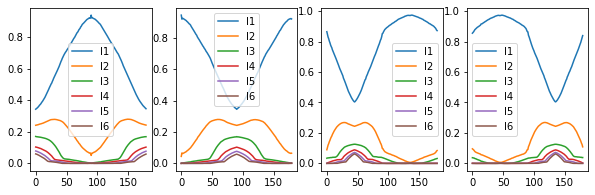

In [33]:
from matplotlib import pyplot as plt

granularity=180

plot4view(mean_arr)


In [34]:
DF = pd.DataFrame(np.transpose(mean_arr))
 
# save the dataframe as a csv file
DF.to_csv("C_batch_feature_norm.csv")

In [48]:
import json
import numpy as np

json_data = {
    "n_neighbors": 1,
    "leaf_size": 30,
    "_tree": {
        "node_data": [
            [0, 180, 1, 0]
        ]
    }
}

# 動態增加 dada 節點
mean_arr_t=np.round(np.transpose(mean_arr[1:25,:]),4)
new_data = np.array([[21.0, 3.0], [22.0, 4.0]])
new_node = {"data": mean_arr_t.tolist()}
json_data["_tree"].update(new_node)


# 將 JSON 數據轉換為 JSON 字符串
json_str = json.dumps(json_data)

with open('C_batch_feature_norm.json', 'w') as f:
    json.dump(json_data, f)


# Print the JSON string
#print(json_str)

In [35]:
from main import allFeature, create_matrices, allFeatureNorm, SSDFeature
import cv2

pixart7920_img="img/2023_1_16_15_56_33_Image.bmp" # theta=-78
#pixart7920_img="img/2023_1_16_11_43_53_Image.bmp" # theta=51
#pixart7920_img="img/2023_1_16_11_43_43_Image.bmp" # theta=89

arr = cv2.cvtColor(cv2.imread(pixart7920_img), cv2.COLOR_BGR2GRAY)
fArr=allFeature(arr)


X_test_sin=fArr[[12,13,14,15,16,17,18,19,20,21,22,23]]
X_test_cos=fArr[[0,1,2,3,4,5,6,7,8,9,10,11]]

print("fArr=",fArr)
print("X_test_sin=",X_test_sin)
print("X_test_cos=",X_test_cos)


fArr= [118  10   1   0   0   0 160  97  60  30  20  10  79   5   2   0   0   0
  84  26   2   0   0   0]
X_test_sin= [79  5  2  0  0  0 84 26  2  0  0  0]
X_test_cos= [118  10   1   0   0   0 160  97  60  30  20  10]


[0.90769231 0.07692308 0.00769231 0.         0.         0.
 0.42328042 0.25661376 0.15873016 0.07936508 0.05291005 0.02645503
 0.90804598 0.05747126 0.02298851 0.         0.         0.
 0.74336283 0.2300885  0.01769912 0.         0.         0.        ]


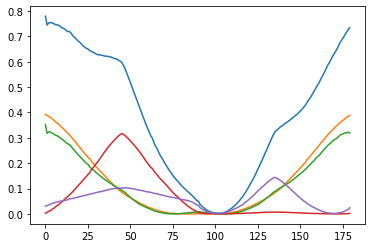

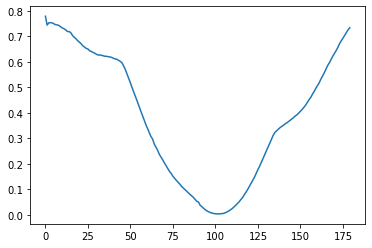

In [36]:

def plotSSDFeature(y,mean_arr):
    ssdArr=np.zeros([180,5])
    for i in range(180):
        ssd = SSDFeature(y,mean_arr[1:25,i])
        #print(i,ssd,y, mean_arr[:,i])
        ssdArr[i,:]=ssd
    
    plt.plot(ssdArr)
    return ssdArr

y=allFeatureNorm(arr)
print(y)


ssdAll=plotSSDFeature(y,mean_arr)


plt.show()
plt.plot(ssdAll[:,0])
plt.show()


theta= -78
(42, 42)


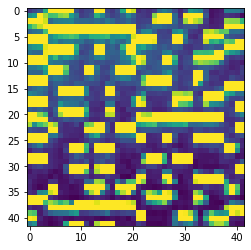

In [37]:
minIdx=np.argmin(ssdAll[:,0])
if minIdx>90:
    theta =  minIdx-180
else:
    theta=minIdx
print("theta=",theta)    
correct_challenge=create_matrices(arr, theta, scale=4)

print(correct_challenge.shape)
plt.imshow(correct_challenge)